<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/ps6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In [3]:
gd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Development%20Index.xlsx?raw=true")

In [4]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SDG4.4,NaN,NaN,NaN,SDG8.5,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Gender Development Index,NaN,NaN,NaN,Human Development Index,NaN,NaN,NaN,...,NaN,NaN,NaN,Mean years of schooling,NaN,NaN,NaN,Estimated gross national income per capita,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Value,NaN,NaN,NaN,...,NaN,NaN,NaN,(years),NaN,NaN,NaN,(2017 PPP $),NaN,NaN
4,HDI rank,Country,Value,NaN,Group,NaN,Female,NaN,Male,NaN,...,NaN,Male,NaN,Female,NaN,Male,NaN,Female,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [5]:
gd=gd[6:197]

In [6]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [7]:
gd1 = gd.copy()

In [8]:
gd1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [9]:
gd1.rename(columns={'Unnamed:0':'rank'},inplace=True)
gd1.rename(columns={'Unnamed:1':'country'},inplace=True)
gd1.rename(columns={'Unnamed:2':'Gender Development Index'},inplace=True)
gd1.rename(columns={'Unnamed:6':'HDI Female'},inplace=True)
gd1.rename(columns={'Unnamed:8':'HDI Male'},inplace=True)
gd1.rename(columns={'Unnamed:10':'Life expectancy at birth female'},inplace=True)
gd1.rename(columns={'Unnamed:12':'Life expectancy at birth male'},inplace=True)
gd1.rename(columns={'Unnamed:14':'Expected years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed:16':'Expected years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed:18':'Mean years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed:20':'Mean years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed:22':'GNI female'},inplace=True)
gd1.rename(columns={'Unnamed:24':'GNI male'},inplace=True)

In [ ]:
gd1_data={"country": []}

In [10]:
gd1 #question: why only one name be changed with the same code? 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
gd1.columns

Index(['rank', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [ ]:
gd1

,rank,Unnamed: 1,Unnamed: 2,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18,Unnamed: 20,Unnamed: 22,Unnamed: 24
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728


In [ ]:
gd1.rename(columns={'Unnamed:1':'country'},inplace=True)
gd1.rename(columns={'Unnamed:2':'Gender Development Index'},inplace=True)
gd1.rename(columns={'Unnamed:6':'HDI Female'},inplace=True)
gd1.rename(columns={'Unnamed:8':'HDI Male'},inplace=True)
gd1.rename(columns={'Unnamed:10':'Life expectancy at birth female'},inplace=True)
gd1.rename(columns={'Unnamed:12':'Life expectancy at birth male'},inplace=True)
gd1.rename(columns={'Unnamed:14':'Expected years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed:16':'Expected years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed:18':'Mean years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed:20':'Mean years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed:22':'GNI female'},inplace=True)
gd1.rename(columns={'Unnamed:24':'GNI male'},inplace=True)

In [ ]:
gd1 #still cannot rename

,rank,Unnamed: 1,Unnamed: 2,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18,Unnamed: 20,Unnamed: 22,Unnamed: 24
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [ ]:
trace1 = go.Box(
    y=gd1["Unnamed: 10"],
    name = "Life Expectancy at Birth (Female)"
)
trace2 = go.Box(
    y=gd1["Unnamed: 12"],
    name = "Life Expectancy at Birth (Male)"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Life Expectancy According To Years"))
iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab

In [ ]:
trace1 = go.Box(
    y=gd1["Unnamed: 22"],
    name = "Female"
)
trace2 = go.Box(
    y=gd1["Unnamed: 24"],
    name = "Male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Estimated Gross National Income per Capita"))
iplot(fig)

In [ ]:
hd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Human%20Development%20Index.xlsx?raw=true")

In [ ]:
hd

,HDI Rank,Country,Human Development Index (HDI),Unnamed: 3,Life expectancy at birth,Unnamed: 5,Expected years of schooling,Unnamed: 7,Mean years of schooling,Unnamed: 9,Gross national income (GNI) per capita
0,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.859660,NaN,66933.004540
1,2,Norway,0.961,NaN,83.2339,NaN,18.185200,NaN,13.003630,NaN,64660.106220
2,3,Iceland,0.959,NaN,82.6782,NaN,19.163059,NaN,13.767170,NaN,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,NaN,85.4734,NaN,17.278170,NaN,12.226210,NaN,62606.845400
4,5,Australia,0.951,NaN,84.5265,NaN,21.054590,NaN,12.726820,NaN,49238.433350
...,...,...,...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,NaN,61.6627,NaN,10.722722,NaN,3.129267,NaN,731.786709
187,188,Central African Republic,0.404,NaN,53.8947,NaN,8.040172,NaN,4.334000,NaN,966.058611
188,189,Niger,0.400,NaN,61.5763,NaN,6.957112,NaN,2.116717,NaN,1239.866936
189,190,Chad,0.394,NaN,52.5254,NaN,8.035914,NaN,2.573774,NaN,1364.169417


In [ ]:
hd.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9'],axis=1, inplace=True)

In [ ]:
hd

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


KeyError: ignored

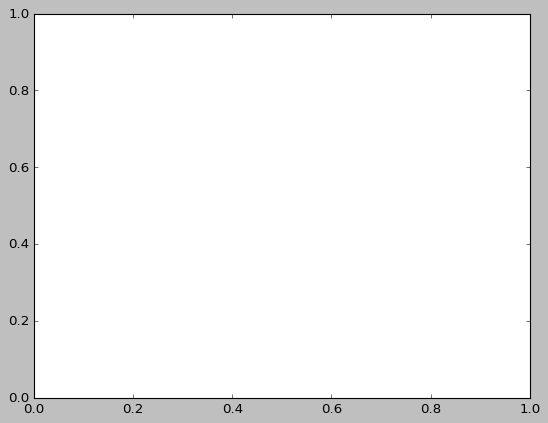

In [ ]:
hd.plot(kind="scatter", x="Life expectancy at birth", y="Human Development Index (HDI)", color="green",alpha=0.8)
plt.legend(loc="best")
plt.xlabel("Life expectancy at birth")
plt.ylabel("Human Development Index (HDI)")
plt.title("Graph 1")
plt.show()

<Axes: xlabel='Gross national income (GNI) per capita', ylabel='Life expectancy at birth'>

Text(0.5, 0, 'Gross national income (GNI) per capita')

Text(0, 0.5, 'Life expectancy at birth')

Text(0.5, 1.0, 'Graph 2')

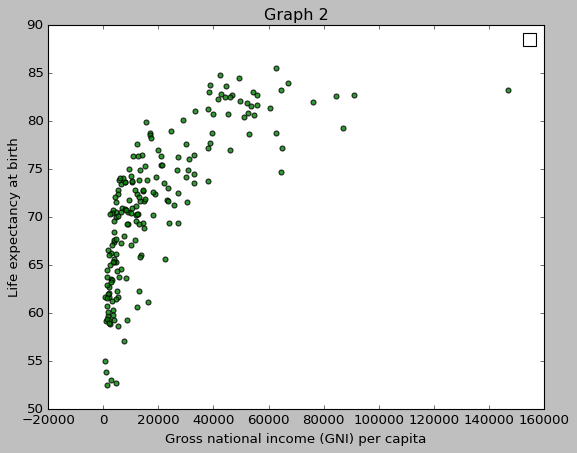

In [ ]:
hd.plot(kind="scatter", x="Gross national income (GNI) per capita", y="Life expectancy at birth", color="green",alpha=0.8)
plt.legend(loc="best")
plt.xlabel("Gross national income (GNI) per capita")
plt.ylabel("Life expectancy at birth")
plt.title("Graph 2")
plt.show() #It seems like the that key error only happens to 'Human Development Index (HDI)'.  